# AIAP 18 Technical Assessment - EDA
Lai Wei Jie

laiweijiesg@gmail.com

### **Objectives**



As an Artificial Intelligence Engineer at SolaraTech, your primary responsibility is to develop models that classify solar panel efficiency as ‘Low’, ‘Medium’, or ‘High’. By leveraging historical same day forecasted weather data, you will implement predictive algorithms that identify and learn from patterns associated with varying efficiency levels.
These models will be instrumental in strategically managing the company’s operational and manpower costs, optimising energy production on high-efficiency days and scheduling maintenance during low-efficiency periods. Your work will ensure that SolaraTech maximises power output while maintaining cost-effectiveness and reliability.




### **Summary of steps in EDA**

1. **Data Collection and Integration**

*   Load data from source for weather and air quality.
*   Merge the datasets based on a common key, data_ref


2. **Data Cleaning and Preprocessing**

*   Dropping null values
*   Replacing placeholder values, "-" "--" with median value


3. **Data Transformation/ Feature Engineering**


*   Combining different values with identical meaning in Dew Point, and Wind Direction
*   Label encoding ordinal variables (Target Feature, Dew Point)
*   One Hot Encoding: Wind Direction
*   Combining separate PSI and PM area columns.

4. **Summary Statistics**

*   Describe the summary statistics of the dataset
*  Understand the spread of variables and possible outliers


5. **Data Visualization**

*   Plot distributions of key variables to understand their spread and central tendency.
*   Plot relationships between variables using a correlation heatmap


### **Importing Libraries**

In [194]:
# eda.ipynb

# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os


### **Data Collection and Integration**

Download datasets and load into dataframe

In [195]:
# Function to download the database file
def download_db(url, local_filename):
    os.makedirs(os.path.dirname(local_filename), exist_ok=True)
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

# Download the databases
download_db('https://techassessment.blob.core.windows.net/aiap18-assessment-data/weather.db', 'data/weather.db')
download_db('https://techassessment.blob.core.windows.net/aiap18-assessment-data/air_quality.db', 'data/air_quality.db')

# Function to load data from SQLite databases
def load_data(db_path, table_name):
    conn = sqlite3.connect(db_path)
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    conn.close()
    return df

    # Load weather data
weather_data = load_data('data/weather.db', 'weather')
# Load air quality data
air_quality_data = load_data('data/air_quality.db', 'air_quality')

Since we have two datasets to analyse and a common data_ref, we shall merge them for analysis



In [196]:
# Merge the two datasets on the 'data_ref' column
combined_data = pd.merge(weather_data, air_quality_data, on='data_ref', how='inner')

# Display the first few rows of the combined dataframe
display(combined_data.head())

,data_ref,date_x,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Wind Direction,Daily Solar Panel Efficiency,date_y,pm25_north,pm25_south,pm25_east,pm25_west,pm25_central,psi_north,psi_south,psi_east,psi_west,psi_central
0,4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea,01/04/2014,-,2,2,2,28.4,32.4,7.5,25.9,8.07,18.0,-59.3,100.0,1006,VH,W,High,01/04/2014,20,16,18,23,19,58,56,57,66,59
1,c9d3c825-fd94-4e61-a4bc-2cf0f2208de0,02/04/2014,0,0,0,--,28.8,32.6,--,33.1,7.57,23.0,59.2,100.0,1005,Very High,S,Medium,02/04/2014,18,14,-,22,16,57,53,54,61,56
2,6d445ffb-d4c2-4f94-a27e-224fabe46d10,03/04/2014,0,0,0,0,29.3,--,--,43.2,6.72,16.0,59.7,98.5,1005,Low,E,Medium,03/04/2014,12,12,10,14,10,55,53,52,59,54
3,7a404c50-710f-451a-9a42-a66bb783a3d0,04/04/2014,0,0,0,0,28.6,32.4,7.4,33.1,7.55,20.0,59.1,100.0,1011,Very High,W,Medium,04/04/2014,--,-,24,19,25,58,57,55,-,56
4,0d3194a7-ad1a-456e-9bf8-b1bae730977b,05/04/2014,23.4,15.2,17.2,17.4,26.4,28,5.4,28.1,5.27,74.0,58.9,100.0,1012,Very High,east,Low,05/04/2014,18,19,21,13,17,64,64,66,-,66


In [197]:
# Display in depth info for our dataframe

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4258 entries, 0 to 4257
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref                       4258 non-null   object 
 1   date_x                         4258 non-null   object 
 2   Daily Rainfall Total (mm)      4258 non-null   object 
 3   Highest 30 Min Rainfall (mm)   4258 non-null   object 
 4   Highest 60 Min Rainfall (mm)   4258 non-null   object 
 5   Highest 120 Min Rainfall (mm)  4258 non-null   object 
 6   Min Temperature (deg C)        4258 non-null   object 
 7   Maximum Temperature (deg C)    4258 non-null   object 
 8   Min Wind Speed (km/h)          4258 non-null   object 
 9   Max Wind Speed (km/h)          4240 non-null   object 
 10  Sunshine Duration (hrs)        4239 non-null   float64
 11  Cloud Cover (%)                4239 non-null   float64
 12  Wet Bulb Temperature (deg F)   4258 non-null   f

### **Data Cleaning and Preprocessing**





In [198]:
# Display column names to identify exact names
print(combined_data.columns)

Index(['data_ref', 'date_x', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Min Temperature (deg C)',
       'Maximum Temperature (deg C)', 'Min Wind Speed (km/h)',
       'Max Wind Speed (km/h)', 'Sunshine Duration (hrs)', 'Cloud Cover (%)',
       'Wet Bulb Temperature (deg F)', 'Relative Humidity (%)',
       'Air Pressure (hPa)', 'Dew Point Category', 'Wind Direction',
       'Daily Solar Panel Efficiency', 'date_y', 'pm25_north', 'pm25_south',
       'pm25_east', 'pm25_west', 'pm25_central', 'psi_north', 'psi_south',
       'psi_east', 'psi_west', 'psi_central'],
      dtype='object')


In [199]:
# Drop unnecessary columns
columns_to_drop = ['data_ref', 'date_x', 'date_y']
combined_data = combined_data.drop(columns=columns_to_drop)

# Rename dataframe
df = combined_data.copy()

# Verify the new DataFrame structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4258 entries, 0 to 4257
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Rainfall Total (mm)      4258 non-null   object 
 1   Highest 30 Min Rainfall (mm)   4258 non-null   object 
 2   Highest 60 Min Rainfall (mm)   4258 non-null   object 
 3   Highest 120 Min Rainfall (mm)  4258 non-null   object 
 4   Min Temperature (deg C)        4258 non-null   object 
 5   Maximum Temperature (deg C)    4258 non-null   object 
 6   Min Wind Speed (km/h)          4258 non-null   object 
 7   Max Wind Speed (km/h)          4240 non-null   object 
 8   Sunshine Duration (hrs)        4239 non-null   float64
 9   Cloud Cover (%)                4239 non-null   float64
 10  Wet Bulb Temperature (deg F)   4258 non-null   float64
 11  Relative Humidity (%)          4258 non-null   float64
 12  Air Pressure (hPa)             4258 non-null   i

In [200]:
# Data Cleaning and Preprocessing
# Checking for missing values
combined_missing = df.isnull().sum()
combined_missing


Daily Rainfall Total (mm)         0
Highest 30 Min Rainfall (mm)      0
Highest 60 Min Rainfall (mm)      0
Highest 120 Min Rainfall (mm)     0
Min Temperature (deg C)           0
Maximum Temperature (deg C)       0
Min Wind Speed (km/h)             0
Max Wind Speed (km/h)            18
Sunshine Duration (hrs)          19
Cloud Cover (%)                  19
Wet Bulb Temperature (deg F)      0
Relative Humidity (%)             0
Air Pressure (hPa)                0
Dew Point Category                0
Wind Direction                    0
Daily Solar Panel Efficiency      0
pm25_north                       42
pm25_south                       42
pm25_east                        42
pm25_west                        42
pm25_central                     42
psi_north                        42
psi_south                        42
psi_east                         42
psi_west                         42
psi_central                      42
dtype: int64

In [201]:
# Display rows with any missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Display the rows
rows_with_missing_values

,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Wind Direction,Daily Solar Panel Efficiency,pm25_north,pm25_south,pm25_east,pm25_west,pm25_central,psi_north,psi_south,psi_east,psi_west,psi_central
34,0,0,0,0,29.4,32.7,8,27,8.19,13.0,60.0,100.0,1009,Very High,N,Low,None,None,None,None,None,58,52,53,52,57
35,0,0,0,0,29.4,32.7,8,27,8.19,13.0,60.0,100.0,1009,Very High,N,Low,16,-,11,16,14,None,None,None,None,None
58,3.4,1.6,--,--,27.5,32.4,6.1,29.5,7.57,21.0,59.2,100.0,1008,Very High,NW,Medium,None,None,None,None,None,44,40,37,--,40
59,3.4,1.6,--,--,27.5,32.4,6.1,29.5,7.57,21.0,59.2,100.0,1008,Very High,NW,Medium,12,--,8,13,12,None,None,None,None,None
141,27.8,15.4,27,27.6,28.2,31,8.6,-,4.81,71.0,59.7,100.0,1006,Extreme,E,Low,None,None,None,None,None,55,52,54,56,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,--,--,-,0,28.9,32.6,5.1,24.1,8.47,4.0,60.0,100.0,998,Very High,E,High,20,10,14,-,-,None,None,None,None,None
3931,--,--,-,0,28.9,32.6,5.1,24.1,8.47,4.0,60.0,100.0,998,Very High,E,High,None,None,None,None,None,63,55,56,51,61
3932,--,--,-,0,28.9,32.6,5.1,24.1,8.47,4.0,60.0,100.0,998,Very High,E,High,20,10,14,-,-,None,None,None,None,None
4196,19.8,3.4,4.8,9.4,26.6,30.6,6.6,22.2,6.48,57.0,58.4,100.0,1003,High,E,Low,None,None,None,None,None,21,26,40,34,-


In [202]:
# Export df to csv for visual inspection

# Export DataFrame to CSV file
df.to_csv('combined_data.csv', index=False)

Since the proportion of rows with missing values is small, we proceed to simply drop observations with missing values

In [203]:
# Display the number of rows before dropping
print(f"Number of rows before dropping: {df.shape[0]}")

# Drop rows with any missing values
df_dropped = df.dropna()

# Display the number of rows after dropping
print(f"Number of rows after dropping: {df_dropped.shape[0]}")

# Number of rows dropped
print(f"Number of rows dropped: {df.shape[0] - df_dropped.shape[0]}")

# Display percentage of rows dropped
print(f"Percentage % of rows dropped: {((df.shape[0] - df.shape[0]) / df.shape[0]) * 100:.2f}%")

# Verify the DataFrame no longer has missing values
print("Any missing values left:", df.isnull().any().any())

# Reassign dropped df to original df
df = df_dropped

Number of rows before dropping: 4258
Number of rows after dropping: 4157
Number of rows dropped: 101
Percentage % of rows dropped: 0.00%
Any missing values left: True


In [204]:
# Display info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4157 entries, 0 to 4257
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Rainfall Total (mm)      4157 non-null   object 
 1   Highest 30 Min Rainfall (mm)   4157 non-null   object 
 2   Highest 60 Min Rainfall (mm)   4157 non-null   object 
 3   Highest 120 Min Rainfall (mm)  4157 non-null   object 
 4   Min Temperature (deg C)        4157 non-null   object 
 5   Maximum Temperature (deg C)    4157 non-null   object 
 6   Min Wind Speed (km/h)          4157 non-null   object 
 7   Max Wind Speed (km/h)          4157 non-null   object 
 8   Sunshine Duration (hrs)        4157 non-null   float64
 9   Cloud Cover (%)                4157 non-null   float64
 10  Wet Bulb Temperature (deg F)   4157 non-null   float64
 11  Relative Humidity (%)          4157 non-null   float64
 12  Air Pressure (hPa)             4157 non-null   int64 

### **Data Transformation/ Feature Engineering**

Visualising and encoding categorical features

A number of columns present as object types in info(), but present as int64 types in value.counts() due to the presence of unexpected inputs like '-' and '--'.

We will clean unexpected inputs to convert the object types to int64 types for pre-processing.

This was also observed when exporting the dataframe into a csv for visual inspection.


In [205]:
# Get the list of object type columns
object_columns = df.select_dtypes(include=['object']).columns

# Display unique values and their counts for each object column
for col in object_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")



Column: Daily Rainfall Total (mm)
Daily Rainfall Total (mm)
0       1960
-        211
--       198
0.2      168
0.8       80
        ... 
63.2       1
46         1
53.8       1
15.6       1
34         1
Name: count, Length: 242, dtype: int64


Column: Highest 30 Min Rainfall (mm)
Highest 30 Min Rainfall (mm)
0       1942
0.2      221
--       211
-        202
0.4      125
        ... 
20.4       1
31.6       1
49.8       1
36         1
24.2       1
Name: count, Length: 170, dtype: int64


Column: Highest 60 Min Rainfall (mm)
Highest 60 Min Rainfall (mm)
0       1939
-        228
0.2      199
--       199
0.4      113
        ... 
20.8       1
34.8       1
16.8       1
47         1
52         1
Name: count, Length: 198, dtype: int64


Column: Highest 120 Min Rainfall (mm)
Highest 120 Min Rainfall (mm)
0       1925
-        218
--       188
0.2      184
0.4      104
        ... 
27         1
21.4       1
30.4       1
24.2       1
37         1
Name: count, Length: 217, dtype: int64


Colu

In [206]:
import re

# Function to clean and convert columns to numeric
def clean_and_convert(df, columns):

    # Function to replace non-numeric characters
    def replace_non_numeric(val):
        if isinstance(val, str):
            # Replace non-numeric with empty string
            return re.sub(r'[^0-9.-]', '', val)
        return val

    # Apply the replacement function to each specified column
    for column in columns:
        df[column] = df[column].apply(replace_non_numeric)

        # Convert columns to numeric types, coercing errors
        df[column] = pd.to_numeric(df[column], errors='coerce')

    return df

# List of columns to clean and convert
columns_to_convert = [
    'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)',
    'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)',
    'Min Temperature (deg C)', 'Maximum Temperature (deg C)',
    'Min Wind Speed (km/h)', 'Max Wind Speed (km/h)',
    'pm25_north', 'pm25_south', 'pm25_east', 'pm25_west',
    'pm25_central', 'psi_north', 'psi_south', 'psi_east',
    'psi_west', 'psi_central'
]

# Clean and convert the specified columns
df = clean_and_convert(df, columns_to_convert)

# Verify the data types after conversion
print(df.info())

# Verify that the conversion worked by checking the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 4157 entries, 0 to 4257
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Rainfall Total (mm)      3748 non-null   float64
 1   Highest 30 Min Rainfall (mm)   3744 non-null   float64
 2   Highest 60 Min Rainfall (mm)   3730 non-null   float64
 3   Highest 120 Min Rainfall (mm)  3751 non-null   float64
 4   Min Temperature (deg C)        3763 non-null   float64
 5   Maximum Temperature (deg C)    3751 non-null   float64
 6   Min Wind Speed (km/h)          3747 non-null   float64
 7   Max Wind Speed (km/h)          3742 non-null   float64
 8   Sunshine Duration (hrs)        4157 non-null   float64
 9   Cloud Cover (%)                4157 non-null   float64
 10  Wet Bulb Temperature (deg F)   4157 non-null   float64
 11  Relative Humidity (%)          4157 non-null   float64
 12  Air Pressure (hPa)             4157 non-null   int64 

After this transformation, the presence of Nan is greater than expected, with some columns missing data representing almost a 10% weight of the 4258 observations.

Rather than dropping 10% of the data, we will pre-process it by replacing NaN with the median value in each column, a mean value would be sensitive to outliers, therefore we will try replacing it with the value in the 50th percentile.

In [207]:
# Replace NaN values with the mean of the respective columns
df[columns_to_convert] = df[columns_to_convert].fillna(df[columns_to_convert].median())

# Verify that there are no more NaN values in the specified columns
print(df[columns_to_convert].isnull().sum())

# Verify the data types after conversion
print(df.info())

Daily Rainfall Total (mm)        0
Highest 30 Min Rainfall (mm)     0
Highest 60 Min Rainfall (mm)     0
Highest 120 Min Rainfall (mm)    0
Min Temperature (deg C)          0
Maximum Temperature (deg C)      0
Min Wind Speed (km/h)            0
Max Wind Speed (km/h)            0
pm25_north                       0
pm25_south                       0
pm25_east                        0
pm25_west                        0
pm25_central                     0
psi_north                        0
psi_south                        0
psi_east                         0
psi_west                         0
psi_central                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4157 entries, 0 to 4257
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Rainfall Total (mm)      4157 non-null   float64
 1   Highest 30 Min Rainfall (mm)   4157 non-null   float64
 2   Highest 60


After cleaning the unexpected input, and replacing all Nan's with the mean, we preserve 4157 observations for training, the next step is to visualise our categorical variables and decide on an endcoding strategy



Exploring all categorical columns and their range of values

In [208]:
# Get the list of object type columns
object_columns = df.select_dtypes(include=['object']).columns

# Display unique values and their counts for each object column
for col in object_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Dew Point Category
Dew Point Category
High             1566
Very High        1364
Very Low          132
Moderate          130
High Level        120
Low               119
H                 103
high               96
VERY HIGH          96
HIGH               92
very high          90
VH                 80
Extreme            74
M                  15
MODERATE           14
LOW                11
L                  11
Minimal             9
Normal              8
VL                  6
very low            5
low                 5
moderate            4
Below Average       4
VERY LOW            3
Name: count, dtype: int64


Column: Wind Direction
Wind Direction
SW           480
NW           457
N            455
SE           445
E            444
NE           439
S            415
W            414
SOUTHEAST     70
southeast     57
northeast     47
NORTHEAST     37
WEST          30
Northward     27
northwest     27
NE.           27
NW.           24
south         24
W.            22
SE.           2

Two of the categorical variables has a range of inputs signifying the same thing, for example: Dew Point Category, Very High, VH and VERY HIGH. We will encode the inputs with the same meanings with some transformations.

Columns to transform:
Dew Point Category, Wind Direction

Dew Point Category

In [209]:
# Convert all values in the Dew Point Category column to uppercase
df['Dew Point Category'] = df['Dew Point Category'].str.upper()

# Define the mapping for specific cases
dew_point_mapping = {
    'H': 'HIGH',
    'HIGH LEVEL' : 'HIGH',
    'VH': 'VERY HIGH',
    'M': 'MODERATE',
    'L': 'LOW',
    'VL': 'VERY LOW',
    'MINIMAL': 'VERY LOW',  # Convert 'Minimal' to 'Very Low'
    'NORMAL': 'MODERATE',  # Convert 'Normal' to 'Moderate'
    'EXTREME': 'VERY HIGH',  # Assuming 'Extreme' should be mapped to 'Very High'
    'BELOW AVERAGE': 'LOW'  # Assuming 'Below Average' should be mapped to 'Low'
}

# Apply the mapping to the Dew Point Category column
df['Dew Point Category'] = df['Dew Point Category'].replace(dew_point_mapping)

# Verify the mapping
print(df['Dew Point Category'].value_counts())

Dew Point Category
HIGH         1977
VERY HIGH    1704
MODERATE      171
VERY LOW      155
LOW           150
Name: count, dtype: int64


Wind Direction

In [210]:
# Remove periods at the end of the string
df['Wind Direction'] = df['Wind Direction'].str.rstrip('.')

# Convert all values in the Wind Direction column to uppercase
df['Wind Direction'] = df['Wind Direction'].str.upper()

# Define the mapping for specific cases
wind_direction_mapping = {
    'SOUTHEAST': 'SE',
    'SOUTH': 'S',
    'SOUTHWARD': 'S',
    'SW': 'SW',
    'NORTH': 'N',
    'NORTHWARD': 'N',
    'NE': 'NE',
    'NORTHEAST': 'NE',
    'NW': 'NW',
    'NORTHWEST': 'NW',
    'WEST': 'W',
    'EAST': 'E',
    'E': 'E',
    'W': 'W'
}

# Apply the mapping to the Wind Direction column
df['Wind Direction'] = df['Wind Direction'].replace(wind_direction_mapping)

# Sort the value counts in ascending order
sorted_value_counts = df['Wind Direction'].value_counts().sort_values(ascending=True)

# Print the sorted value counts
print(sorted_value_counts)

Wind Direction
S     482
W     485
E     493
SW    501
N     524
NW    528
NE    550
SE    594
Name: count, dtype: int64


Label Encode Dew Point Category and Daily Solar Panel Efficiency, ordinal variables

In [211]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Label encode Dew Point Category
df['Dew Point Category'] = label_encoder.fit_transform(df['Dew Point Category'])

# Label encode Daily Solar Panel Efficiency
df['Daily Solar Panel Efficiency'] = label_encoder.fit_transform(df['Daily Solar Panel Efficiency'])

# Print the mapping for Dew Point Category
dew_point_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Dew Point Category Mapping:", dew_point_mapping)

# Print the mapping for Daily Solar Panel Efficiency
efficiency_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Daily Solar Panel Efficiency Mapping:", efficiency_mapping)

Dew Point Category Mapping: {'High': 0, 'Low': 1, 'Medium': 2}
Daily Solar Panel Efficiency Mapping: {'High': 0, 'Low': 1, 'Medium': 2}


One Hot Encode Wind Direction, Nominal Variable

In [212]:
# One-hot encode Wind Direction
df = pd.get_dummies(df, columns=['Wind Direction'])

**Feature Engineering**

One strategy to adopt, based on the correlation values and data dictionary provided, is to combine the different directions in PSI and PMS together, this will potentially reduce nosie and outliers, and lead to better training efficicency.

In [213]:
# Combine PM2.5 columns into one
df['PM25 Combined'] = df[['pm25_north', 'pm25_south', 'pm25_east', 'pm25_west', 'pm25_central']].mean(axis=1)

# Combine PSI columns into one
df['PSI Combined'] = df[['psi_north', 'psi_south', 'psi_east', 'psi_west', 'psi_central']].mean(axis=1)

# Drop the original individual columns
df = df.drop(columns=['pm25_north', 'pm25_south', 'pm25_east', 'pm25_west', 'pm25_central',
                      'psi_north', 'psi_south', 'psi_east', 'psi_west', 'psi_central'])

### Final Cleaned Dataframe

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4157 entries, 0 to 4257
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Rainfall Total (mm)      4157 non-null   float64
 1   Highest 30 Min Rainfall (mm)   4157 non-null   float64
 2   Highest 60 Min Rainfall (mm)   4157 non-null   float64
 3   Highest 120 Min Rainfall (mm)  4157 non-null   float64
 4   Min Temperature (deg C)        4157 non-null   float64
 5   Maximum Temperature (deg C)    4157 non-null   float64
 6   Min Wind Speed (km/h)          4157 non-null   float64
 7   Max Wind Speed (km/h)          4157 non-null   float64
 8   Sunshine Duration (hrs)        4157 non-null   float64
 9   Cloud Cover (%)                4157 non-null   float64
 10  Wet Bulb Temperature (deg F)   4157 non-null   float64
 11  Relative Humidity (%)          4157 non-null   float64
 12  Air Pressure (hPa)             4157 non-null   int64 

### **Summary Statistics**

describe() provides us a way to perform some statistical analysis on the data if required.

Depending on domain knowledge, it might be able to observe some abnormalities and outliers from normal predicted behaviour:

In [215]:
df.describe()

,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Daily Solar Panel Efficiency,PM25 Combined,PSI Combined
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,4.676449,2.780611,3.301516,3.839644,28.087250,31.755016,8.724946,30.151095,7.029254,28.560981,52.957999,97.411884,1008.670435,1.497234,1.347125,14.056507,50.258311
std,12.049512,6.321283,7.794704,8.968128,1.038311,1.401677,2.866599,13.826700,1.362439,20.505004,25.817367,5.017781,3.507537,1.498413,0.795515,9.354215,13.607028
min,0.000000,0.000000,0.000000,0.000000,23.000000,23.700000,0.400000,-59.800000,0.000000,2.000000,-60.700000,68.600000,998.000000,0.000000,0.000000,4.200000,20.600000
25%,0.000000,0.000000,0.000000,0.000000,27.500000,31.100000,6.500000,28.100000,6.720000,17.000000,58.400000,96.900000,1006.000000,0.000000,1.000000,9.600000,42.800000
50%,0.000000,0.000000,0.000000,0.000000,28.200000,31.900000,8.000000,31.700000,7.400000,22.000000,58.900000,100.000000,1009.000000,1.000000,2.000000,12.000000,50.000000
75%,3.200000,2.000000,2.400000,2.800000,28.800000,32.600000,10.400000,35.300000,7.840000,30.000000,59.400000,100.000000,1011.000000,3.000000,2.000000,15.600000,55.600000
max,210.600000,53.400000,73.800000,85.600000,30.700000,35.400000,21.400000,70.600000,9.150000,100.000000,61.800000,100.000000,1020.000000,4.000000,2.000000,196.600000,264.000000


One observation: even though the mean Daily Rainfall total is only 4.67mm, the max is 210mm and min is 0mm.
Meaning that the spread is quite big.

Explore the correlation of each feature, in relation to the target feature.

In order to generate this table, we will make a copy of the dataframe and encode our categorical features, to get a numerical representation of our correlations.

In [216]:
# Make a copy of the original dataframe for visualisations

df_copy = df.copy()

Creating the correlation table in descending order, a negative value indicates inverse relation.

Increase in feature value = decrease in target feature value.

In [217]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the correlation of all features with the target feature 'Daily Solar Panel Efficiency'
target_corr = corr_matrix['Daily Solar Panel Efficiency']

# Sort the correlations in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Display the sorted correlation values
print(target_corr_sorted)

Daily Solar Panel Efficiency     1.000000
Min Wind Speed (km/h)            0.296990
Max Wind Speed (km/h)            0.142262
Air Pressure (hPa)               0.089990
Min Temperature (deg C)          0.089984
Maximum Temperature (deg C)      0.035478
Wind Direction_SE                0.027487
Wet Bulb Temperature (deg F)     0.025582
Wind Direction_N                 0.021054
Wind Direction_NW                0.020633
PSI Combined                     0.013796
Wind Direction_W                 0.003433
Wind Direction_S                 0.002537
Wind Direction_SW               -0.012921
PM25 Combined                   -0.017177
Sunshine Duration (hrs)         -0.025123
Dew Point Category              -0.026142
Relative Humidity (%)           -0.031583
Wind Direction_E                -0.031928
Wind Direction_NE               -0.032061
Daily Rainfall Total (mm)       -0.136552
Cloud Cover (%)                 -0.140229
Highest 60 Min Rainfall (mm)    -0.142973
Highest 120 Min Rainfall (mm)   -0

From this, it would seem that Wind Speed, Cloud Cover and Rainfall are the bigger contributing factors to Solar Panel Efficiency.

While features like wind direction, PSI and PMS are not strongly correlated.


### **Data Visualization**

Plots of target feature and 2 key features: Daily Rainfall Total and Cloud Cover

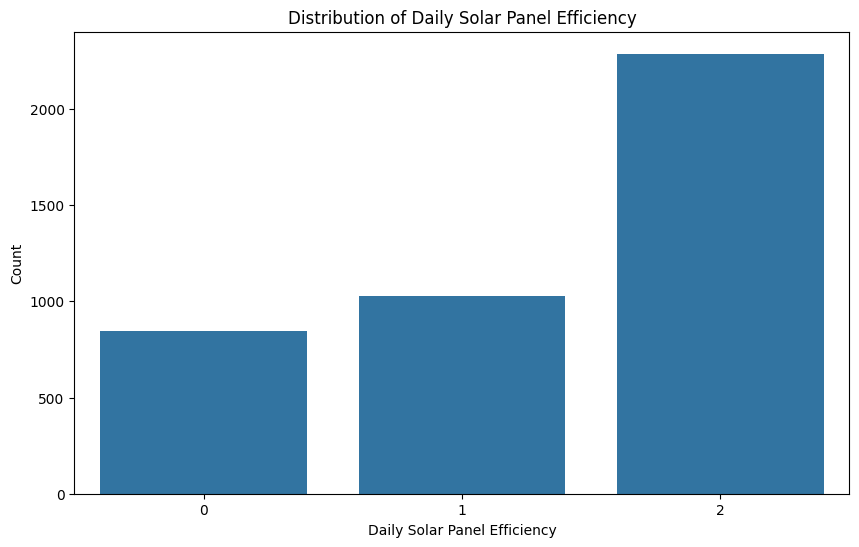

In [218]:
# Plot the distribution of the target feature
plt.figure(figsize=(10, 6))
sns.countplot(x='Daily Solar Panel Efficiency', data=df_copy)
plt.title('Distribution of Daily Solar Panel Efficiency')
plt.xlabel('Daily Solar Panel Efficiency')
plt.ylabel('Count')
plt.show()

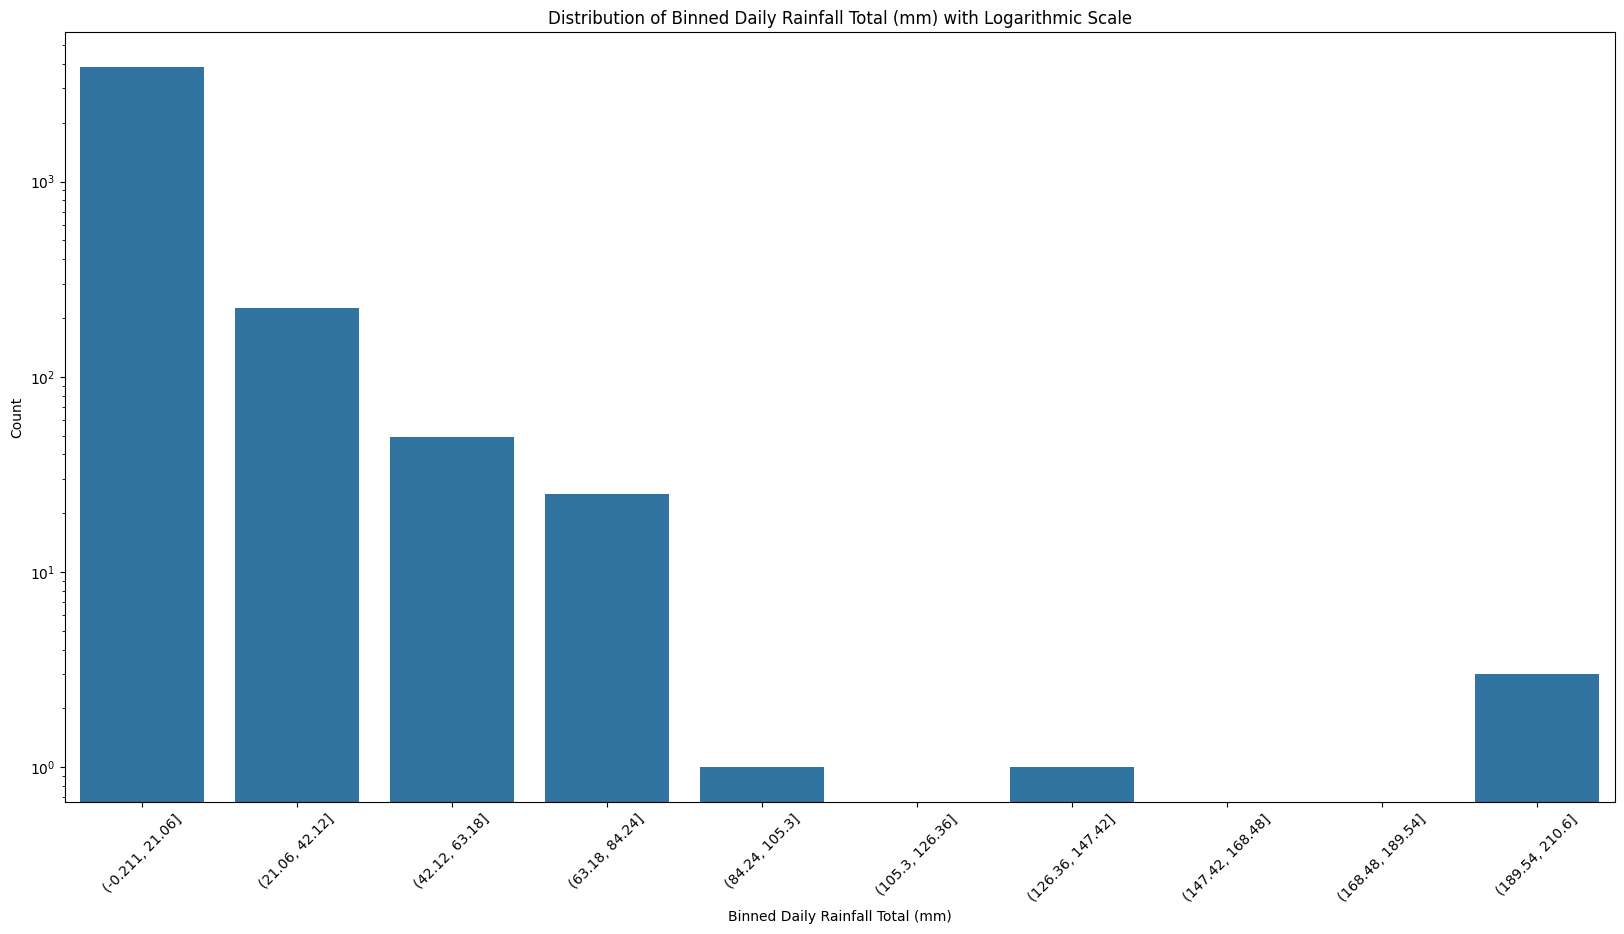

In [219]:
# Bin the 'Daily Rainfall Total (mm)' column into 10 bins
df_copy['Rainfall Binned'] = pd.cut(df_copy['Daily Rainfall Total (mm)'], bins=10)

# Plot the distribution of the binned data with a logarithmic scale
plt.figure(figsize=(20, 10))
sns.countplot(x='Rainfall Binned', data=df_copy)
plt.yscale('log')
plt.title('Distribution of Binned Daily Rainfall Total (mm) with Logarithmic Scale')
plt.xlabel('Binned Daily Rainfall Total (mm)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

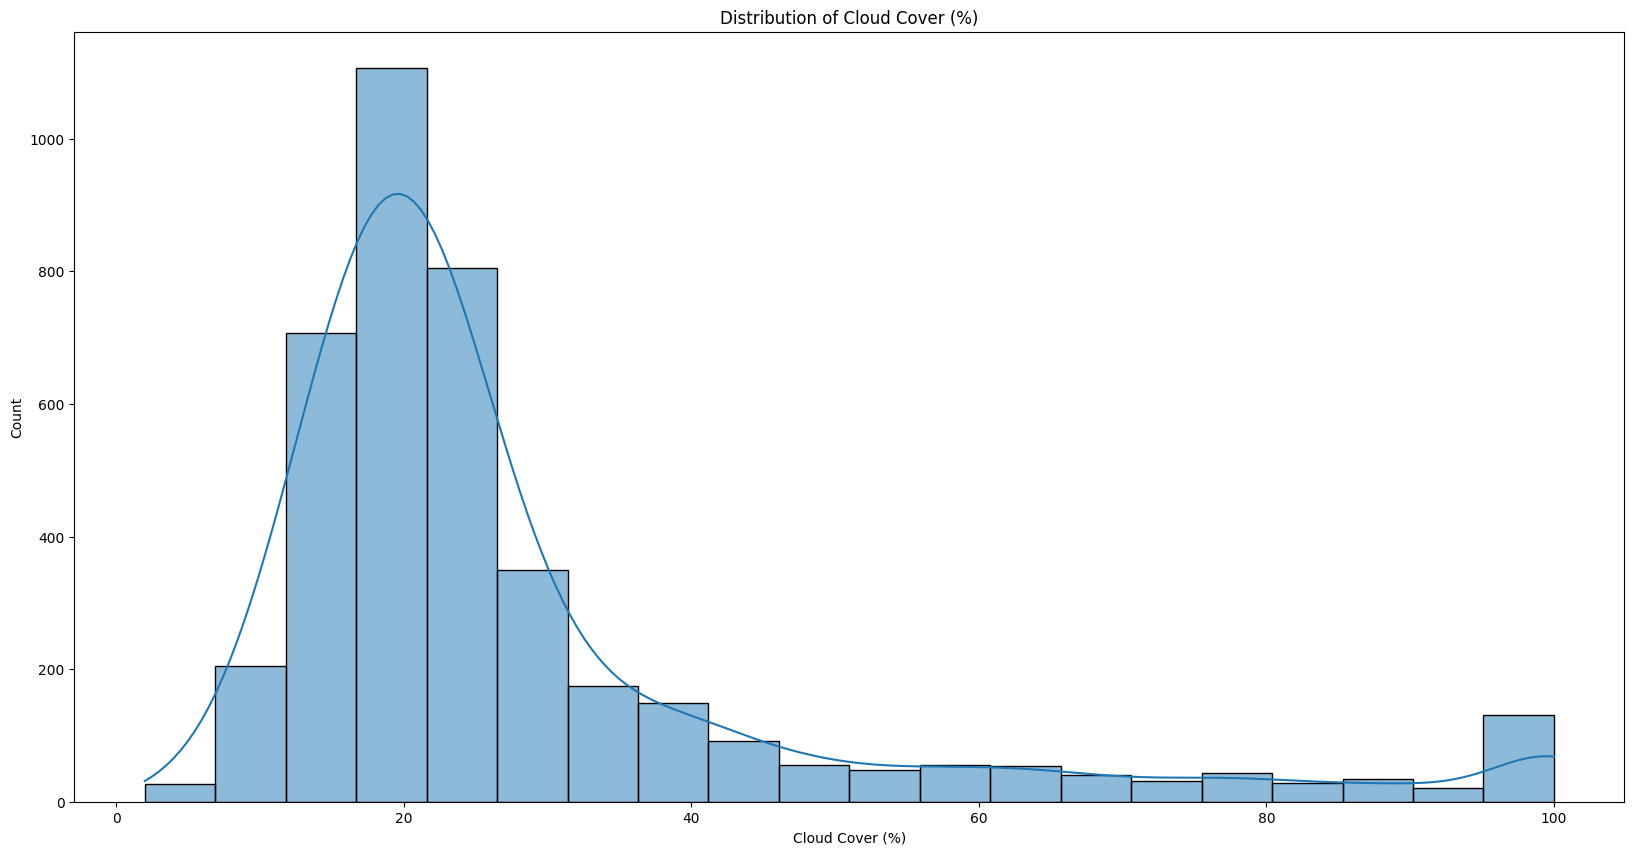

In [220]:
# Plot the distribution of Cloud Cover (%)
plt.figure(figsize=(20, 10))
sns.histplot(df_copy['Cloud Cover (%)'], bins=20, kde=True)
plt.title('Distribution of Cloud Cover (%)')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Count')
plt.show()

Correlation Heatmap

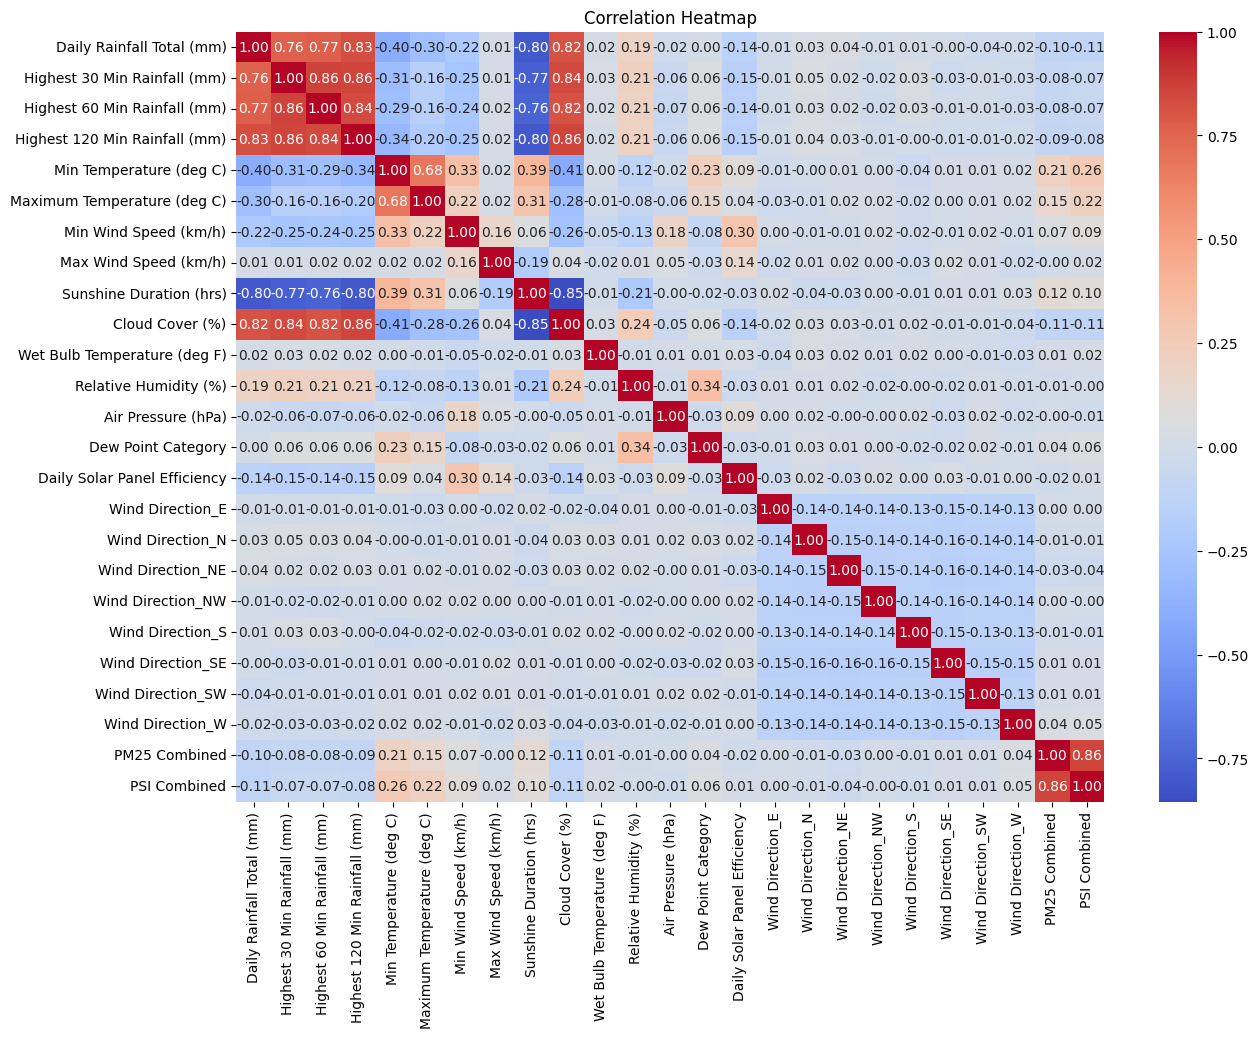

In [221]:
# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

We can see that rainfall features greatly affect cloud cover, while the PM and PSI are strongly correlated with each other, proving that it might be a good deicision to combine the different PM and PSI features.